# Introduction

DataScienceGO Virtual 2020 challenge:

Link to the dataset: [DSGO-Virtual-Oracle-Hackathon](https://github.com/dsgovirtual/DSGO-Virtual-Oracle-Hackathon/tree/main/Data)

3 Different Paths

* Exploratory Analysis: Understand the data, gather insights and focus on an in-depth analysis of the relationships between the measures, the effects over time or between sites.

* Visualization: Create a visualization that communicates a message about what is happening with the air quality. The visualization can be a figure, set of figures, animation or interactive graphic.

* Model: EPA has identified that the total nitrate (NO3) is a metric that they are interested in studying and predictive model that will allow them to estimate the nitrate values when they are missing

# Initialization

In [1]:
# Import all libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # ploting the data
import seaborn as sns # ploting the data
import math # calculation

# EDA and Data Wrangling

In [2]:
file = '/kaggle/input/epa-air-quality/air_status.csv'
df = pd.read_csv(file)

# Visualize data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6159 entries, 0 to 6158
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SITE_ID        6159 non-null   object 
 1   DATEON         6159 non-null   object 
 2   DATEOFF        6159 non-null   object 
 3   TSO4           6159 non-null   float64
 4   TNO3           6159 non-null   float64
 5   TNH4           6159 non-null   float64
 6   Ca             4936 non-null   float64
 7   Mg             4936 non-null   float64
 8   Na             4936 non-null   float64
 9   K              4932 non-null   float64
 10  Cl             3862 non-null   float64
 11  NSO4           6159 non-null   float64
 12  NHNO3          6159 non-null   float64
 13  WSO2           6159 non-null   float64
 14  TOTAL_SO2      6159 non-null   float64
 15  TOTAL_NO3      6159 non-null   float64
 16  FLOW_VOLUME    6159 non-null   float64
 17  VALID_HOURS    6159 non-null   int64  
 18  COMMENT_

In [3]:
# Determine the number of missing values for every column
df.isnull().sum()

SITE_ID             0
DATEON              0
DATEOFF             0
TSO4                0
TNO3                0
TNH4                0
Ca               1223
Mg               1223
Na               1223
K                1227
Cl               2297
NSO4                0
NHNO3               0
WSO2                0
TOTAL_SO2           0
TOTAL_NO3           0
FLOW_VOLUME         0
VALID_HOURS         0
COMMENT_CODES    4842
STD2LOCAL_CF        0
TEMP_SOURCE         0
QA_CODE             0
UPDATE_DATE         0
dtype: int64

In [4]:
#examine the dataset
df.describe()

,TSO4,TNO3,TNH4,Ca,Mg,Na,K,Cl,NSO4,NHNO3,WSO2,TOTAL_SO2,TOTAL_NO3,FLOW_VOLUME,VALID_HOURS,STD2LOCAL_CF,QA_CODE
count,6159.000000,6159.000000,6159.000000,4936.000000,4936.000000,4936.000000,4932.000000,3862.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000
mean,0.868275,0.748712,0.346072,0.171963,0.046181,0.213581,0.059195,0.107112,0.083126,1.212752,0.383226,0.438670,1.942182,32.102340,167.832927,1.100730,2.994155
std,0.590911,0.861001,0.311085,0.156001,0.039782,0.246178,0.050476,0.260301,0.074883,1.064103,0.386834,0.419756,1.562368,6.557159,22.503073,0.073697,0.107972
min,0.028000,0.022200,0.014900,0.002200,0.001900,0.003500,0.003300,0.006900,0.014900,0.025900,0.015000,0.025500,0.051500,2.479000,25.000000,0.955048,1.000000
25%,0.405350,0.219800,0.143400,0.062375,0.017200,0.054100,0.026200,0.014525,0.039500,0.407650,0.147850,0.185250,0.752050,30.238700,165.000000,1.026224,3.000000
50%,0.753100,0.524900,0.269300,0.135250,0.035350,0.131250,0.048300,0.017500,0.061500,0.903200,0.261900,0.309700,1.582800,33.107000,167.000000,1.121092,3.000000
75%,1.219500,0.986750,0.458300,0.240800,0.064900,0.267825,0.076600,0.054275,0.097050,1.711100,0.460950,0.520950,2.736250,35.048350,169.000000,1.160566,3.000000
max,4.086800,13.586900,4.892800,1.964800,0.307100,2.160100,1.046400,2.483400,0.848200,6.826500,3.813300,4.139700,14.350700,199.145900,1000.000000,1.246344,3.000000


In [5]:
df

,SITE_ID,DATEON,DATEOFF,TSO4,TNO3,TNH4,Ca,Mg,Na,K,...,WSO2,TOTAL_SO2,TOTAL_NO3,FLOW_VOLUME,VALID_HOURS,COMMENT_CODES,STD2LOCAL_CF,TEMP_SOURCE,QA_CODE,UPDATE_DATE
0,CON186,2003-06-17,2003-06-24,1.6460,2.6535,1.0740,0.1625,0.0440,0.1980,0.0609,...,0.3286,0.3544,6.0754,36.2704,168,NaN,1.196241,sa,3,2004-02-02
1,CON186,2003-06-24,2003-07-01,1.0356,0.6297,0.4035,0.2331,0.0394,0.1455,0.0444,...,0.4054,0.4466,4.0244,37.0314,167,NaN,1.227204,sa,3,2004-02-02
2,CON186,2003-07-01,2003-07-08,1.5335,1.2570,0.4836,0.2185,0.0759,0.3440,0.1697,...,0.5119,0.5684,5.7479,37.9842,171,NaN,1.228530,sa,3,2004-02-02
3,CON186,2003-07-08,2003-07-15,1.7773,0.8323,0.6537,0.2894,0.0541,0.2134,0.0850,...,0.4154,0.4510,5.0664,37.3987,166,NaN,1.245875,sa,3,2004-02-02
4,CON186,2003-07-15,2003-07-22,2.1637,1.3187,0.7899,0.4331,0.0800,0.2679,0.1382,...,0.6910,0.7512,5.5863,37.1449,166,NaN,1.237604,sa,3,2004-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6154,YOS404,2020-06-09,2020-06-16,0.4253,0.1603,0.1440,0.0856,0.0217,0.0680,0.0386,...,0.3902,0.4404,0.5690,35.3191,167,T01 T04,1.174953,sa,3,2020-08-31
6155,YOS404,2020-06-30,2020-07-07,0.7269,0.4616,0.2599,0.1319,0.0483,0.2216,0.0978,...,0.7262,0.7967,1.1004,36.2906,169,NaN,1.192985,sa,3,2020-09-30
6156,YOS404,2020-07-07,2020-07-14,0.9194,0.3491,0.3103,0.1274,0.0444,0.1962,0.0660,...,0.7270,0.7976,1.0884,36.4162,168,T01 T04,1.204239,sa,3,2020-09-30
6157,YOS404,2020-07-14,2020-07-21,1.2414,0.5379,0.4151,0.1930,0.0673,0.2893,0.1141,...,0.8759,0.9827,1.5961,35.8153,165,T01 T04 W01,1.205901,sa,3,2020-09-30


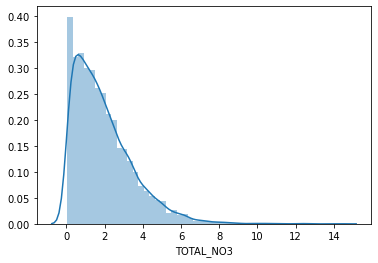

In [6]:
# Target variable distribution
# sns.distplot(df['NHNO3'])
sns.distplot(df['TOTAL_NO3'])

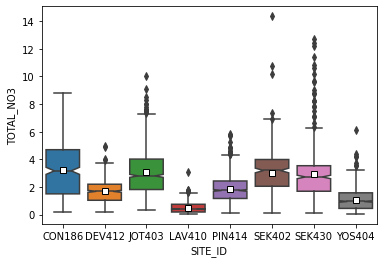

In [7]:
# Target according to sites
# see https://stackoverflow.com/questions/54132989/is-there-a-way-to-change-the-color-and-shape-indicating-the-mean-in-a-seaborn-bo

x='SITE_ID'
#y='NHNO3'
y='TOTAL_NO3'

sns.boxplot(x=x, y=y, data=df, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"});

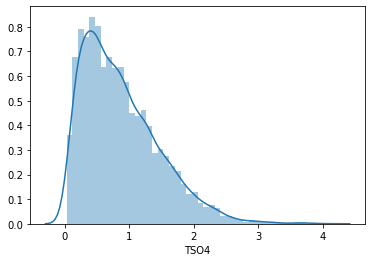

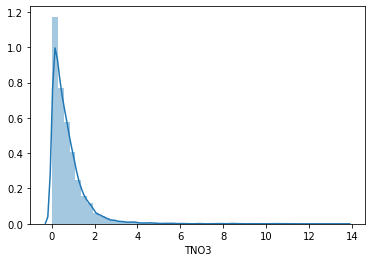

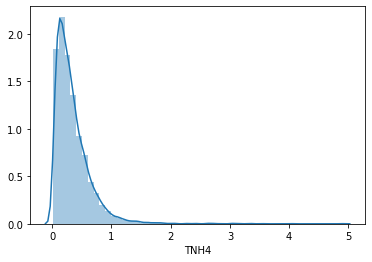

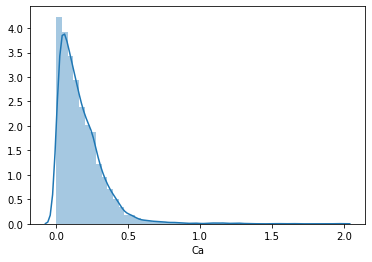

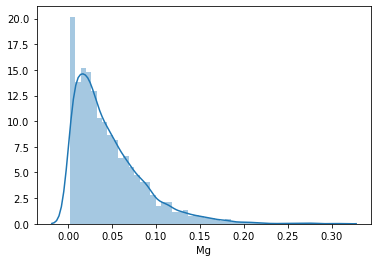

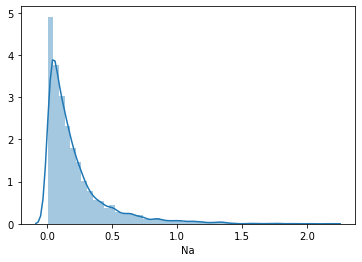

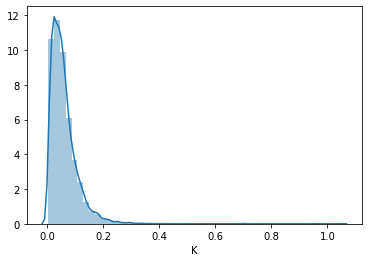

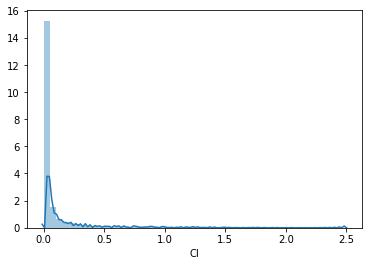

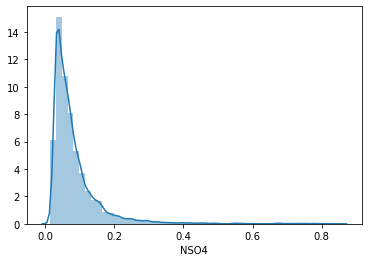

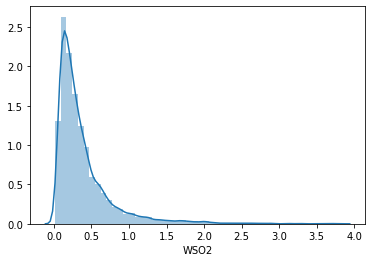

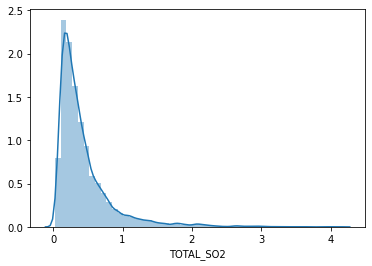

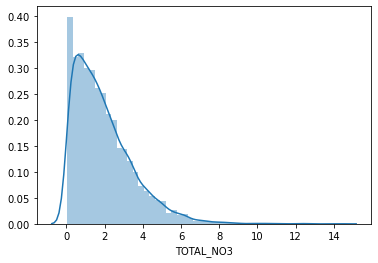

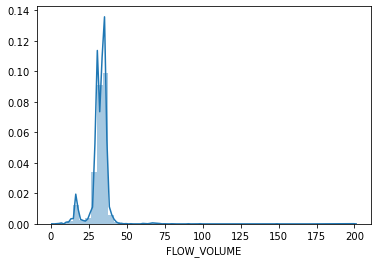

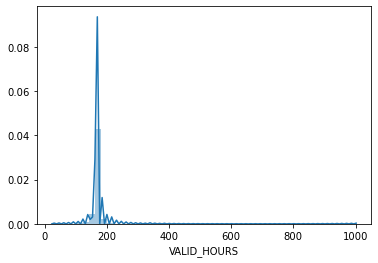

In [8]:
# See https://stackoverflow.com/questions/36018681/stop-seaborn-plotting-multiple-figures-on-top-of-one-another
for x in ['TSO4', 'TNO3', 'TNH4', 'Ca', 'Mg', 'Na', 'K', 'Cl', 'NSO4', 'WSO2', 'TOTAL_SO2', 'TOTAL_NO3', 'FLOW_VOLUME', 'VALID_HOURS']:
  plt.figure()
  sns.distplot(df[x]);

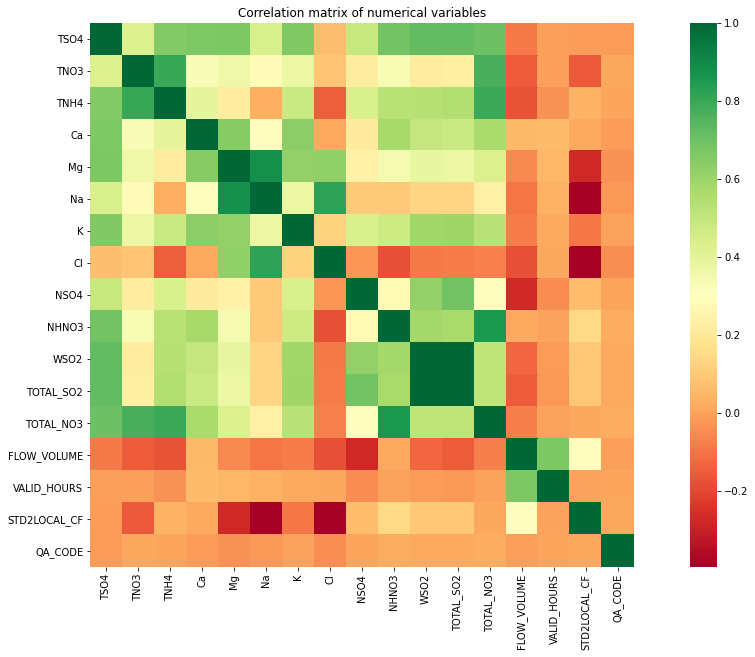

In [9]:
# Correlation
plt.figure(figsize=(20,10))
title = 'Correlation matrix of numerical variables'
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.title(title)
plt.ioff()

In [10]:
df['Date'] =  pd.to_datetime(df['DATEON'])
df.dtypes

SITE_ID                  object
DATEON                   object
DATEOFF                  object
TSO4                    float64
TNO3                    float64
TNH4                    float64
Ca                      float64
Mg                      float64
Na                      float64
K                       float64
Cl                      float64
NSO4                    float64
NHNO3                   float64
WSO2                    float64
TOTAL_SO2               float64
TOTAL_NO3               float64
FLOW_VOLUME             float64
VALID_HOURS               int64
COMMENT_CODES            object
STD2LOCAL_CF            float64
TEMP_SOURCE              object
QA_CODE                   int64
UPDATE_DATE              object
Date             datetime64[ns]
dtype: object

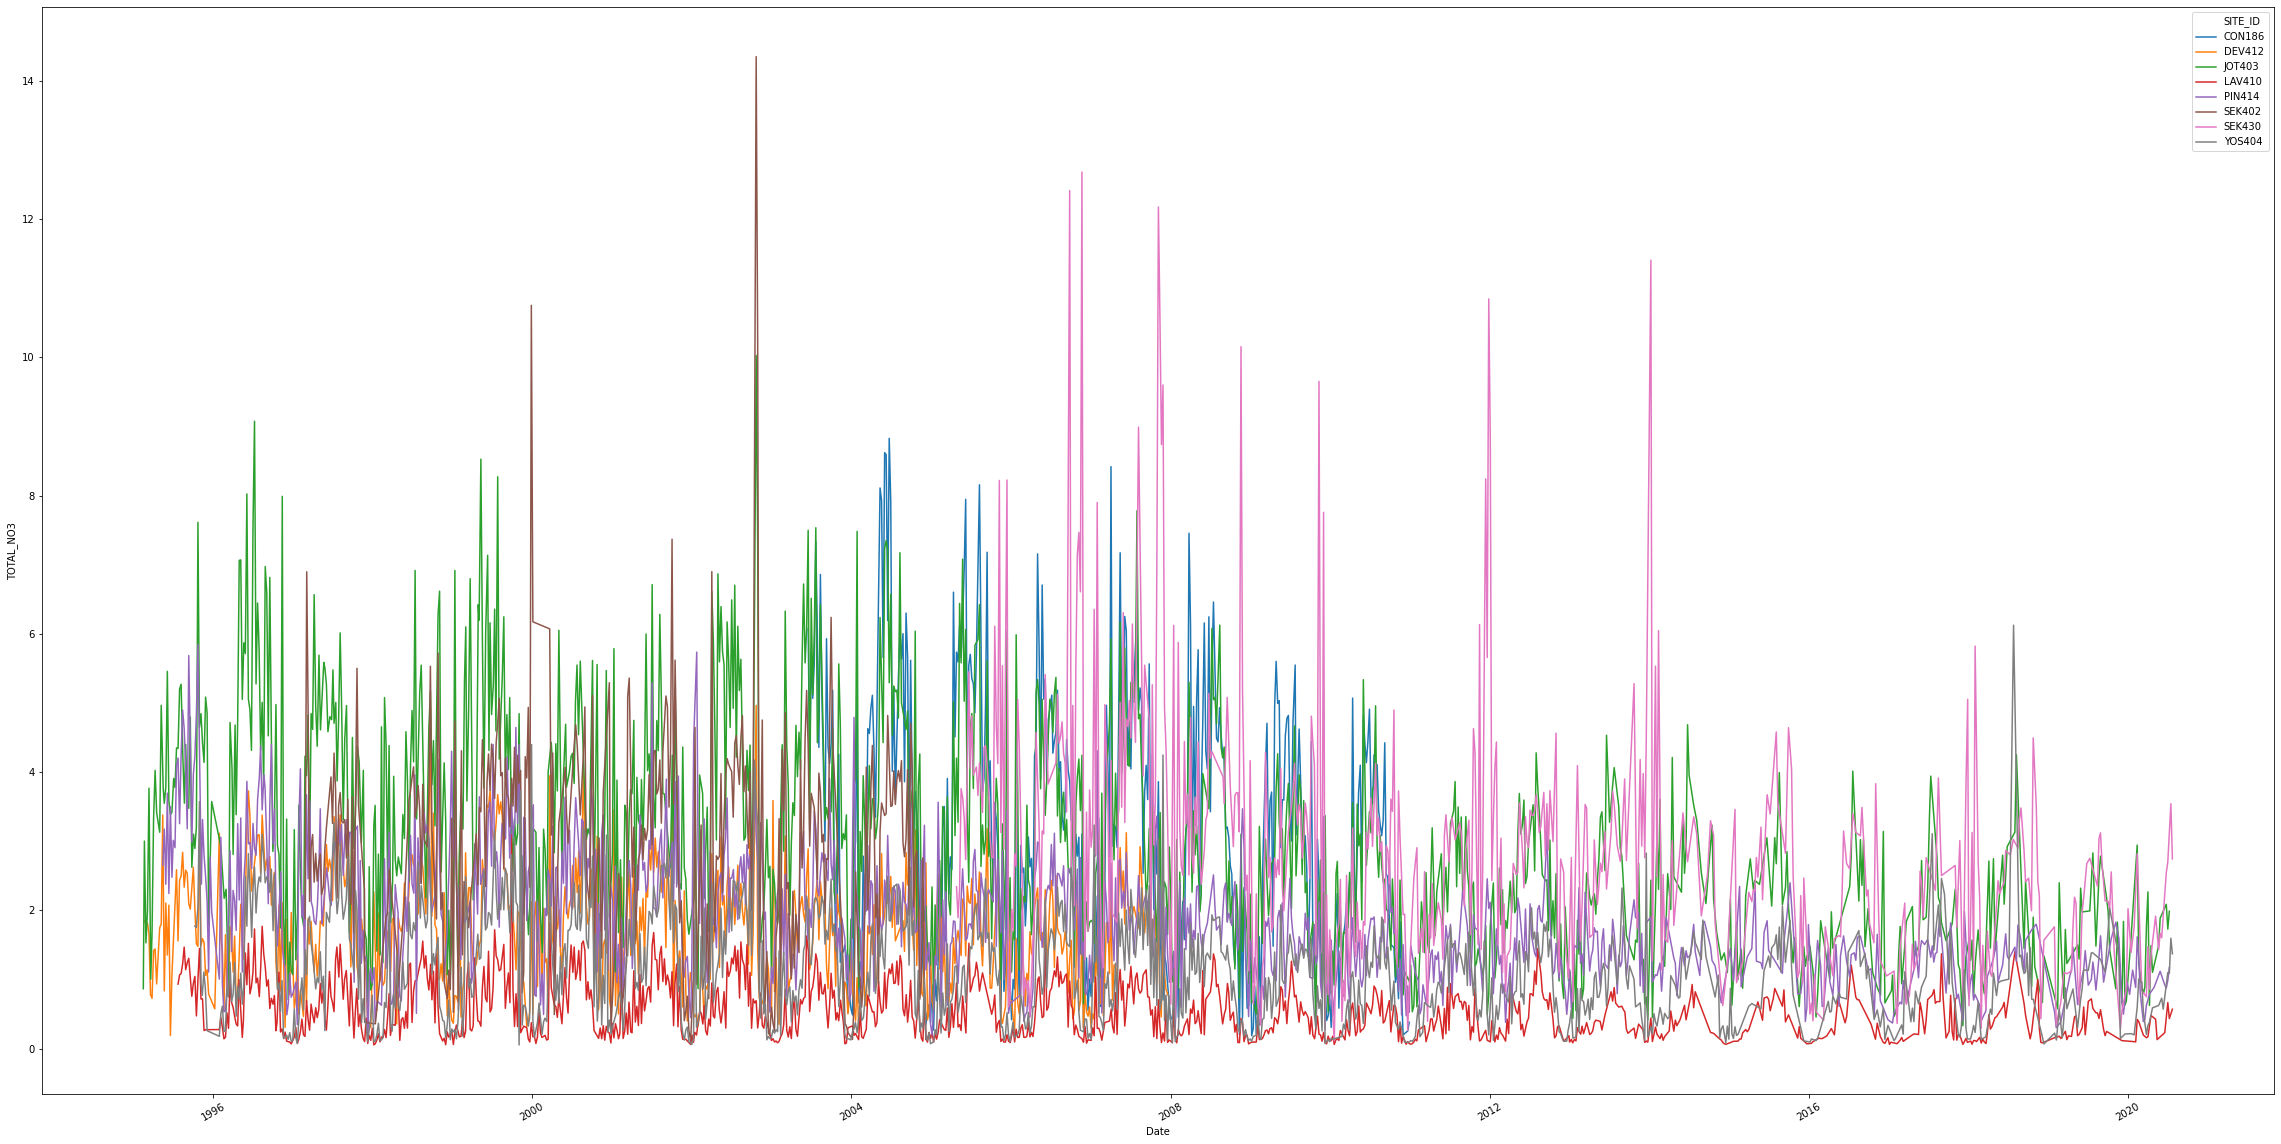

In [11]:
# Time Serie analysis of NO3
# See https://stackoverflow.com/questions/56150437/how-to-plot-a-time-series-graph-using-seaborn-or-plotly

x='Date'
y='TOTAL_NO3'

plt.figure(figsize=(40,20))
sns.lineplot(x=x, y=y, hue='SITE_ID' ,data=df);
plt.xticks(rotation=30);
plt.show()

In [12]:
df_codes = df['COMMENT_CODES']
df_codes.dropna()

143             T04
151             G12
219             G21
308             G12
311             T04
           ...     
6153        T01 T04
6154        T01 T04
6156        T01 T04
6157    T01 T04 W01
6158        T01 T04
Name: COMMENT_CODES, Length: 1317, dtype: object

# Data Visualization

# Model

Random forest regressor is a simple model that can easily accommodate data, categorical and numerical variables. It should be a reasonable baseline model. 


In [13]:
# See https://www.kaggle.com/dfitzgerald3/randomforestregressor

# Select features
# From our EDA the following features seems the most useful to predict the toal NO3 for each site
selected_features = ['TOTAL_NO3', 'SITE_ID', 'DATEON', 'TSO4', 'TNH4', 
                     'Ca', 'Mg', 'Na', 'K', 'Cl', 'NSO4', 'WSO2', 'TOTAL_SO2', 
                     'FLOW_VOLUME', 'TEMP_SOURCE']

df_selected = df[selected_features]

In [14]:
# Recode data as categorical
# https://pbpython.com/categorical-encoding.html
# https://towardsdatascience.com/categorical-encoding-techniques-93ebd18e1f24

df_selected = pd.get_dummies(df_selected, drop_first=True)

In [15]:
# Replace missing values
# Ca, Mg, Na, K, Cl missing values
# Assumption here is that this correspond to measure faillure as fore NO3
# So I will use the average values when values are missing
# See https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns
# Is is important to avaoid leaking information from train to test dataset. 

from sklearn.model_selection import train_test_split
train, test = train_test_split(df_selected, test_size = 0.25, random_state = 0)

In [16]:
# See https://stackoverflow.com/questions/45090639/pandas-shows-settingwithcopywarning-after-train-test-split

pd.options.mode.chained_assignment = None
for feature in ['Ca', 'Mg', 'Na', 'K', 'Cl']:
  train[feature].fillna((train[feature].mean()), inplace=True)
  test[feature].fillna((test[feature].mean()), inplace=True)

In [17]:
train.isnull().sum()

TOTAL_NO3            0
TSO4                 0
TNH4                 0
Ca                   0
Mg                   0
                    ..
DATEON_2020-07-14    0
DATEON_2020-07-21    0
TEMP_SOURCE_sa       0
TEMP_SOURCE_se       0
TEMP_SOURCE_wk       0
Length: 1665, dtype: int64

In [18]:
test.isnull().sum()

TOTAL_NO3            0
TSO4                 0
TNH4                 0
Ca                   0
Mg                   0
                    ..
DATEON_2020-07-14    0
DATEON_2020-07-21    0
TEMP_SOURCE_sa       0
TEMP_SOURCE_se       0
TEMP_SOURCE_wk       0
Length: 1665, dtype: int64

In [19]:
# Split the dataset features and target
X_train = train.drop('TOTAL_NO3', axis=1).values
X_test = test.drop('TOTAL_NO3', axis=1).values
y_train = train['TOTAL_NO3'].values
y_test = test['TOTAL_NO3'].values

In [20]:
# See https://www.kaggle.com/dfitzgerald3/randomforestregressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer

In [21]:
# See https://www.kaggle.com/dfitzgerald3/randomforestregressor
clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [22]:
# Model evaluation R^2 score
# See https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# see https://www.kaggle.com/nsrose7224/random-forest-regressor-accuracy-0-91
# See https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

clf.score(X_train, y_train)

0.9834795976901108

In [23]:
clf.score(X_test, y_test)

0.874108922172077

In [24]:
# Compute MSE score
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.29982971397991187